!pip install deap

In [2]:
import wget

In [3]:
wget.download("http://ai.std-900.ist.mospolytech.ru/genetic_algorithms/berlin52.tsp.txt", "berlin52.tsp.txt")
wget.download("http://ai.std-900.ist.mospolytech.ru/genetic_algorithms/berlin52.opt.tour.txt","berlin52.opt.tour.txt")

'berlin52.opt.tour.txt'

In [1]:
import random
import re
import math
from deap import base, creator, tools, algorithms
import numpy as np
from sklearn.metrics import euclidean_distances
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'Sequence' from 'collections' (C:\Users\Shrek\AppData\Local\Programs\Python\Python310\lib\collections\__init__.py)

In [ ]:
def parse_tsp_file(filename):
    result = []
    with open(filename) as f:
        for line in f:
            m = re.match(r'(\d+) (\d+\.\d+) (\d+\.\d+)', line)
            if m:
                result.append(m.groups()[1:])
    return np.array(result, dtype=np.float32)  

In [ ]:
def read_optimal(filename):
    result = []
    with open(filename) as f:
        for line in f:
            m = re.match(r'^\d+$', line.rstrip())
            if m:
                result.append(m.group())
    return np.array(result, dtype=np.int32) - 1 

In [ ]:
def plot_tours(tours, nodes):
    fig = plt.figure(dpi=150, figsize=(11*len(tours), 7))
    for k in range(len(tours)):
        fig.add_subplot(1, len(tours), k+1)
        plt.axis('off')
        plt.scatter(nodes[:, 0], nodes[:, 1])
        for i in range(len(tours[k])):
            x1, y1 = nodes[tours[k][i]]
            x2, y2 = nodes[tours[k][(i+1) % len(tours[k])]]
            if x1 > x2:
                x1, x2 = x2, x1
                y1, y2 = y2, y1
            x = np.linspace(x1, x2)
            y = (x - x1)*(y2-y1)/(x2 - x1) + y1
            plt.plot(x, y, "r--")
    plt.show()

In [ ]:
def evolution_history_plot(log):
    plt.figure(dpi=100, figsize=(11, 7))
    plt.plot(log.select('min'), c='red', label='Minimum fitness')
    plt.plot(log.select('mean'), c='orange', label='Mean fitness')
    plt.plot(log.select('max'), c='green', label='Max fitness')
    plt.legend(frameon=True)
    plt.ylabel('Fitness'); 
    plt.xlabel('Iterations');
    plt.show()

In [ ]:
nodes = parse_tsp_file('berlin52.tsp.txt')
dm = euclidean_distances(nodes)
optimal_tour = read_optimal('berlin52.opt.tour.txt')

In [ ]:
optimal_tour

array([ 0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46,
       25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34,
       33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30,
       21], dtype=int32)

In [ ]:
IND_SIZE = len(nodes)
CXPB, MUTPB, NGEN = 0.5, 0.2, 200

In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMin)

In [ ]:
np.random.permutation()

TypeError: ignored

In [ ]:
toolbox = base.Toolbox()
toolbox.register('permutation', np.random.permutation, IND_SIZE)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
def evaluate(individual, dm):
    dist = 0
    ch_size = len(individual)
    for i in range(ch_size):
        dist += dm[individual[i], individual[(i+1) % ch_size]]
    return dist,

toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate, dm=dm)

In [ ]:
fit_stats = tools.Statistics(key=lambda ind: ind.fitness.values)
fit_stats.register('mean', np.mean)
fit_stats.register('min', np.min)
fit_stats.register('max', np.max)

hof = tools.HallOfFame(1, similar=np.array_equal)

In [ ]:
np.random.seed(7)
pop = toolbox.population(n=500)

In [ ]:
result, log = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, verbose=True, stats=fit_stats, halloffame=hof)

gen	nevals	mean   	min    	max    
0  	500   	29946.4	25397.7	34392.4
1  	309   	28730.1	24970.1	33006.3
2  	274   	27851.9	22581.9	31993.1
3  	292   	27271.1	20120  	32809.7
4  	290   	26611  	20120  	31936.4
5  	279   	25973.3	20120  	31064.3
6  	310   	25435.9	20120  	32202.6
7  	312   	24791.9	20120  	30299.7
8  	314   	24103.5	19824.5	30146.6
9  	317   	23703.1	19820.6	32190.8
10 	287   	23174  	19824.5	29639.6
11 	301   	22811.6	19163.3	30229.1
12 	288   	22443.6	19163.3	29003.7
13 	304   	22002.1	19163.3	28700.5
14 	297   	21714.1	19025.9	29989.9
15 	276   	21302.7	18927.5	29390.4
16 	287   	21009.5	18614.6	29371.6
17 	296   	20738.9	18487.8	28649.9
18 	300   	20451.8	18263.5	28929.1
19 	300   	20353.1	18028.6	27950  
20 	307   	20175.3	17203.8	29031.3
21 	299   	20066.5	17203.8	28881.9
22 	274   	19898  	17153.2	28190.6
23 	308   	19725.8	16691.9	28477.9
24 	303   	19620.4	17153.2	27101.5
25 	315   	19496.1	16869.8	28255.5
26 	300   	19337.6	16743.3	28164  
27 	310   	19283.8	1

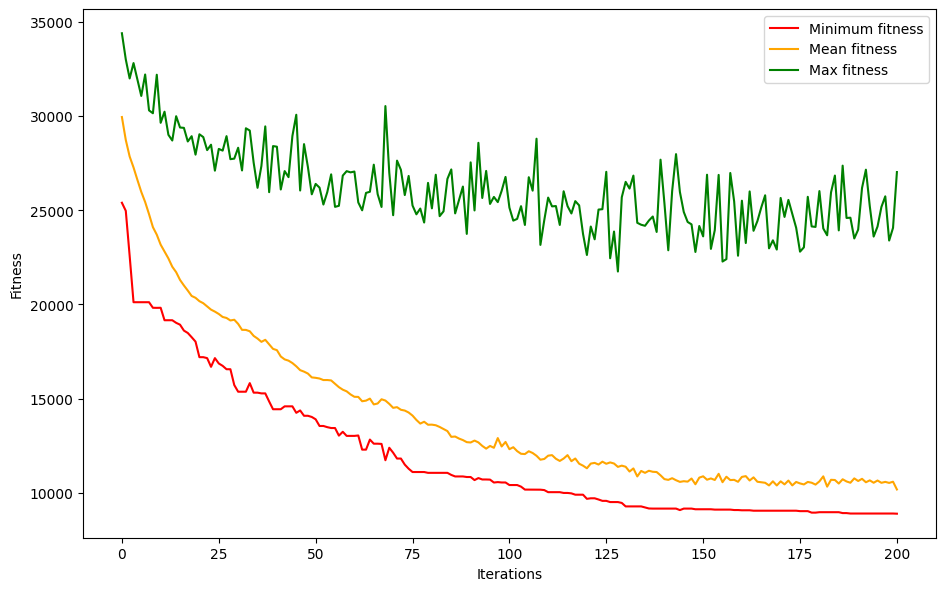

In [ ]:
evolution_history_plot(log)

(8897.710765838623,)
(7544.365919113159,)


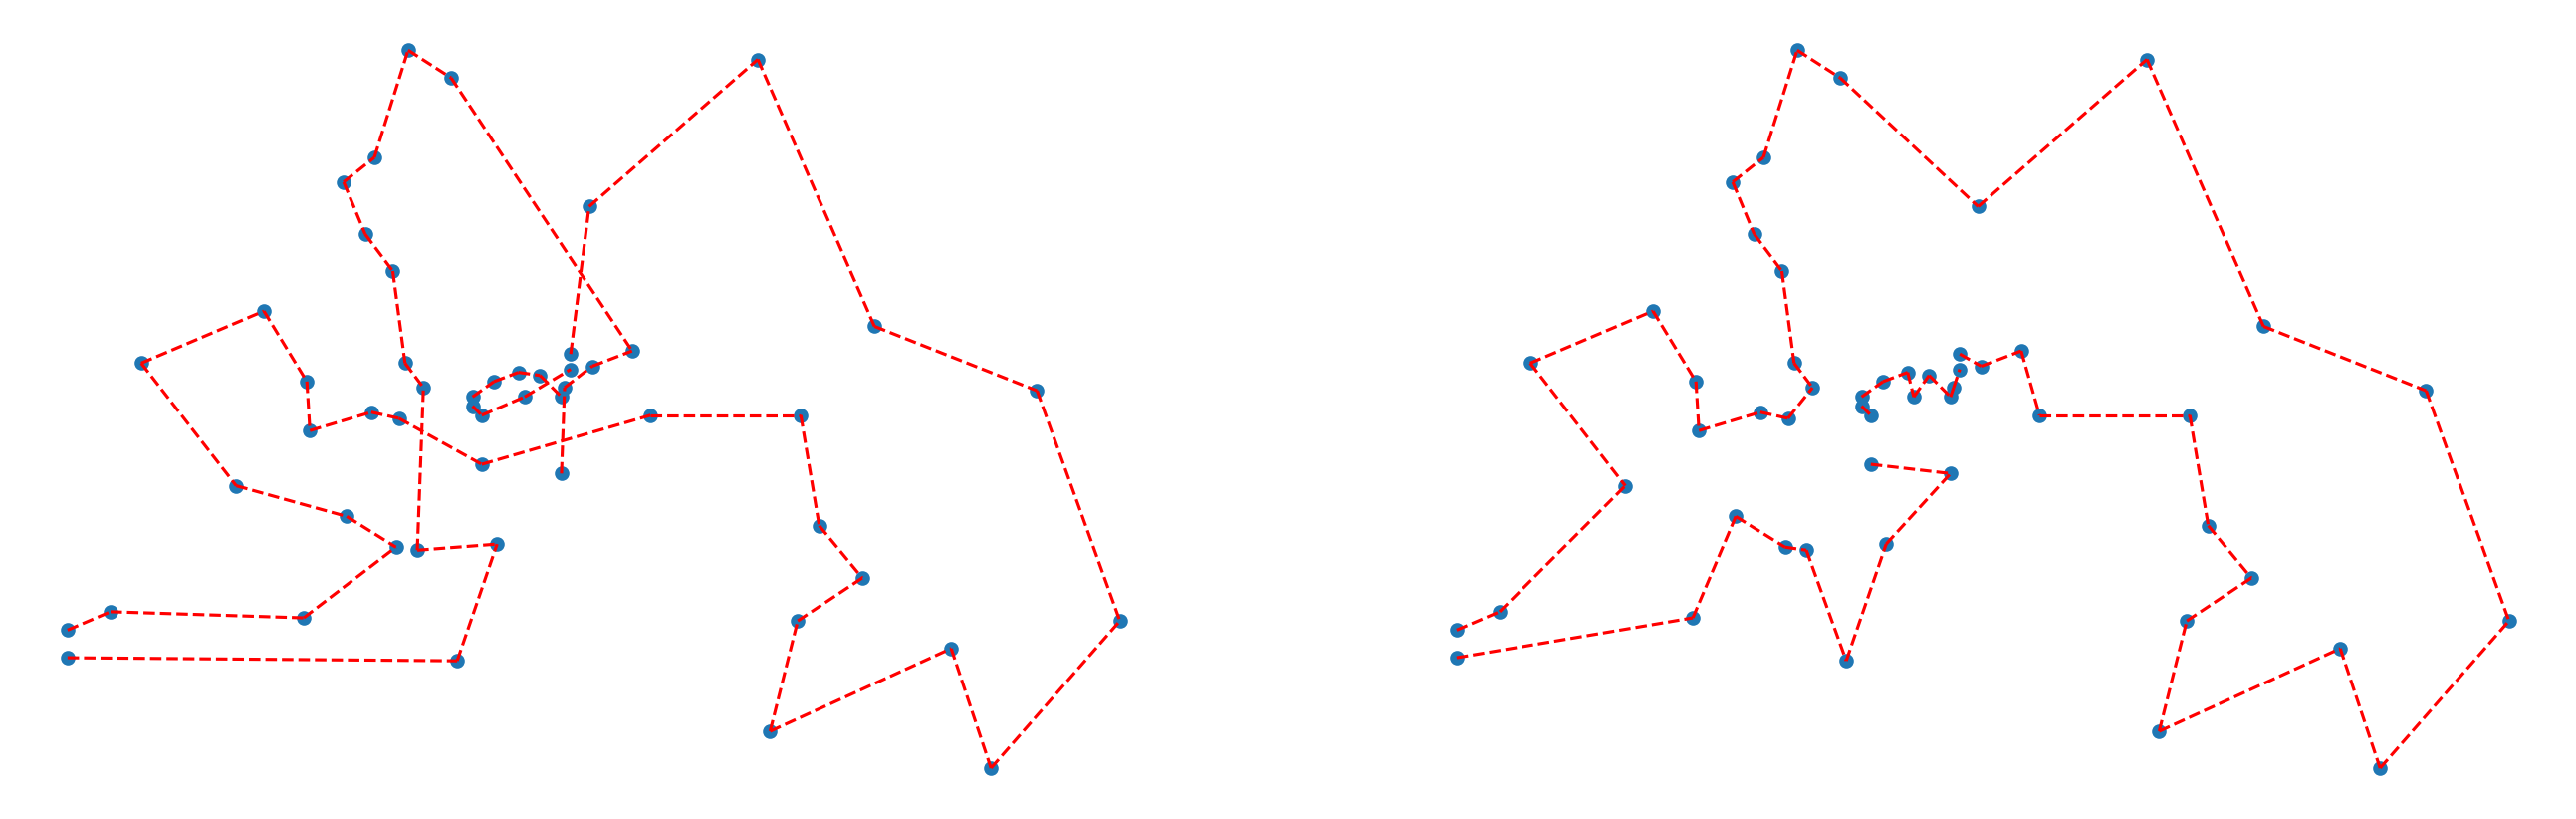

In [ ]:
print(hof[0].fitness.values)
best_ind = creator.Individual(optimal_tour)
print(evaluate(best_ind, dm))
plot_tours([hof[0], best_ind], nodes)

In [ ]:
fit_stats = tools.Statistics(key=lambda ind: ind.fitness.values)
fit_stats.register('mean', np.mean)
fit_stats.register('min', np.min)
fit_stats.register('max', np.max)

hof = tools.HallOfFame(1, similar=np.array_equal)

log = tools.Logbook()

In [ ]:
np.random.seed(7)
pop = toolbox.population(n=500)

In [ ]:
fitnesses = map(toolbox.evaluate, pop)
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

In [ ]:
for g in range(NGEN):
    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
      if random.random() < MUTPB:
          toolbox.mutate(mutant)
          del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    
    pop[:] = offspring

    hof.update(pop)
    record = fit_stats.compile(pop)
    record['gen'] = g + 1
    print('{gen:03} {mean:10.2f} {min:10.2f} {max:10.2f}'.format(**record))
    log.record(**record)

001   28798.89   24969.37   32607.06
002   28042.73   23951.68   33045.92
003   27512.07   23589.72   32678.32
004   27069.66   23465.30   31672.64
005   26641.24   22894.31   32784.71
006   26061.95   21680.80   32892.39
007   25535.96   21587.94   31417.05
008   25107.09   21587.94   31205.98
009   24634.71   19973.96   30162.88
010   24211.90   19973.96   30766.85
011   23872.57   19810.17   31668.86
012   23464.08   19414.12   30684.74
013   23056.76   19414.12   28858.96
014   22604.85   19201.52   30688.65
015   22176.22   19306.87   30436.77
016   21661.38   18273.33   28954.84
017   21383.45   18273.33   31485.01
018   21058.57   18012.77   29993.55
019   20687.43   17762.55   27528.54
020   20311.39   17093.80   29626.69
021   20224.40   17473.09   29014.92
022   19873.19   17274.80   27587.16
023   19949.50   17274.80   29290.24
024   19483.70   16145.83   30325.35
025   19385.86   16835.06   29405.21
026   19474.33   17057.10   26906.18
027   19191.27   17057.10   28264.81
0

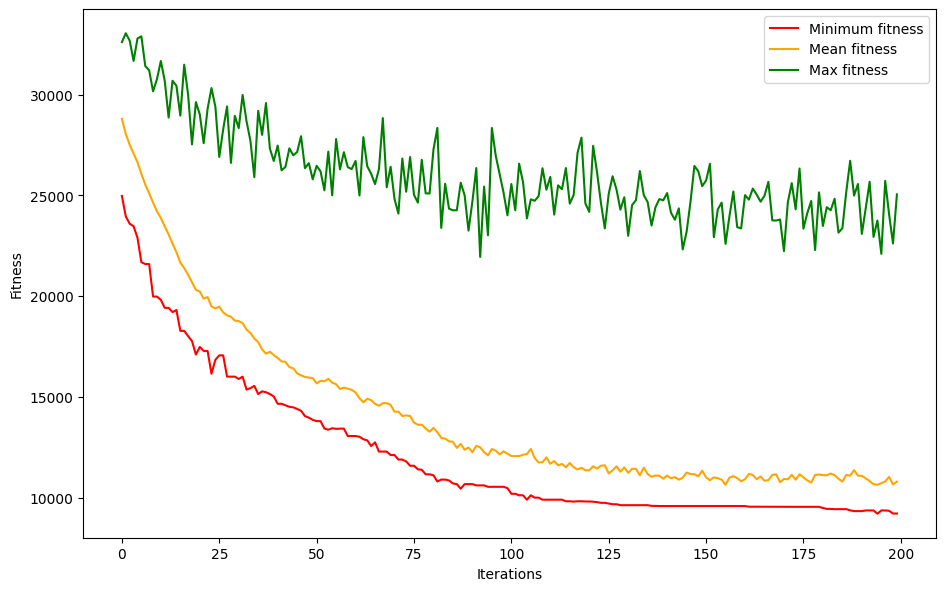

In [ ]:
evolution_history_plot(log)

(9196.54388999939,)
(7544.365919113159,)


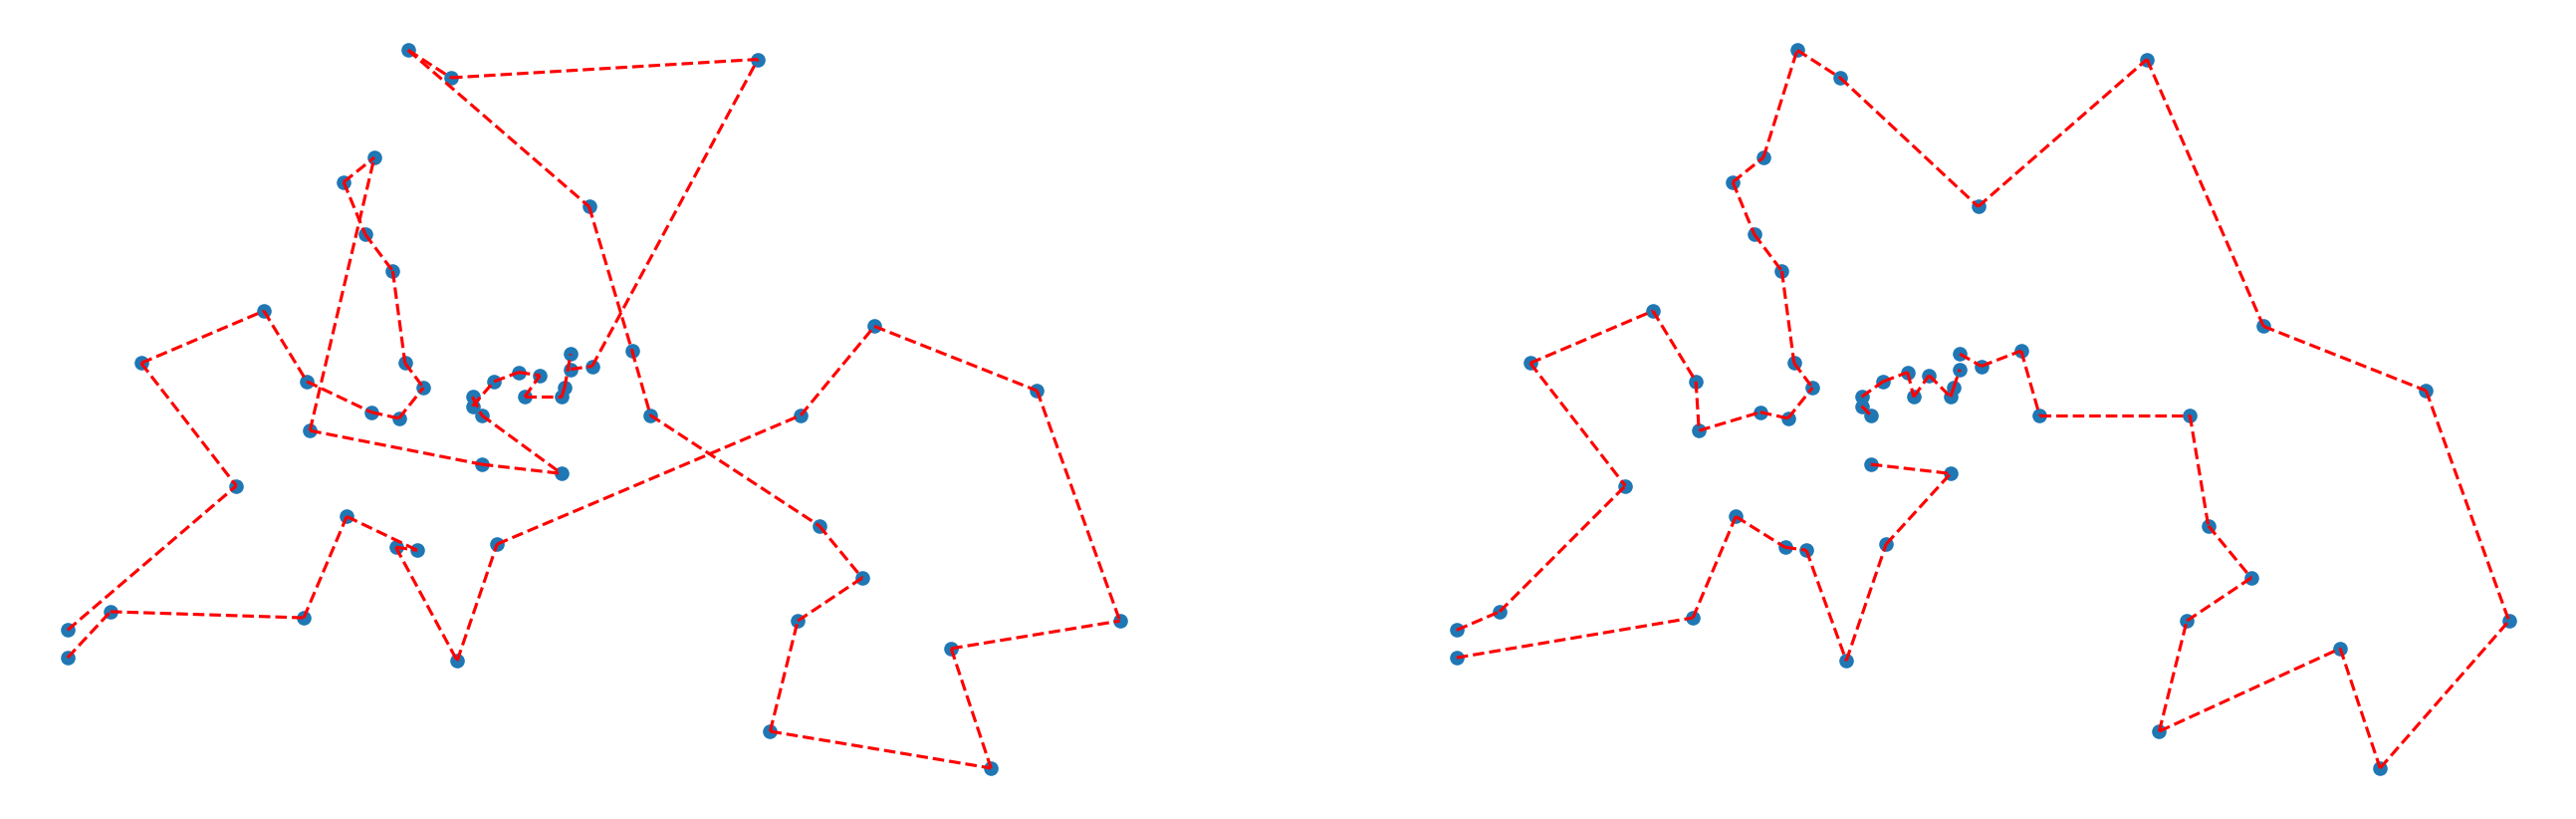

In [ ]:
print(hof[0].fitness.values)
best_ind = creator.Individual(optimal_tour)
print(evaluate(best_ind, dm))
plot_tours([hof[0], best_ind], nodes)